<a href="https://colab.research.google.com/github/madhupandeyy/6th-Sem-ML-LAB/blob/main/LAB_3_Linear_and_Multi_Linear_Regression_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from io import StringIO

# Load dataset from provided content
df = pd.read_csv("/content/housing.csv")

print("Dataset loaded successfully!")
df.head()

Dataset loaded successfully!


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


# **Perform describe() and info()**

In [ ]:
print("Data Information:")
print(df.info())
print("\nData Description:")
print(df.describe())

Data Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB
None

Data Description:
          longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081

Output:

info() shows 20,640 entries with total_bedrooms missing 207 values.

describe() reveals statistical summaries (e.g., median_income ranges 0.5–15, housing_median_age 1–52).

# **Plot Histograms**

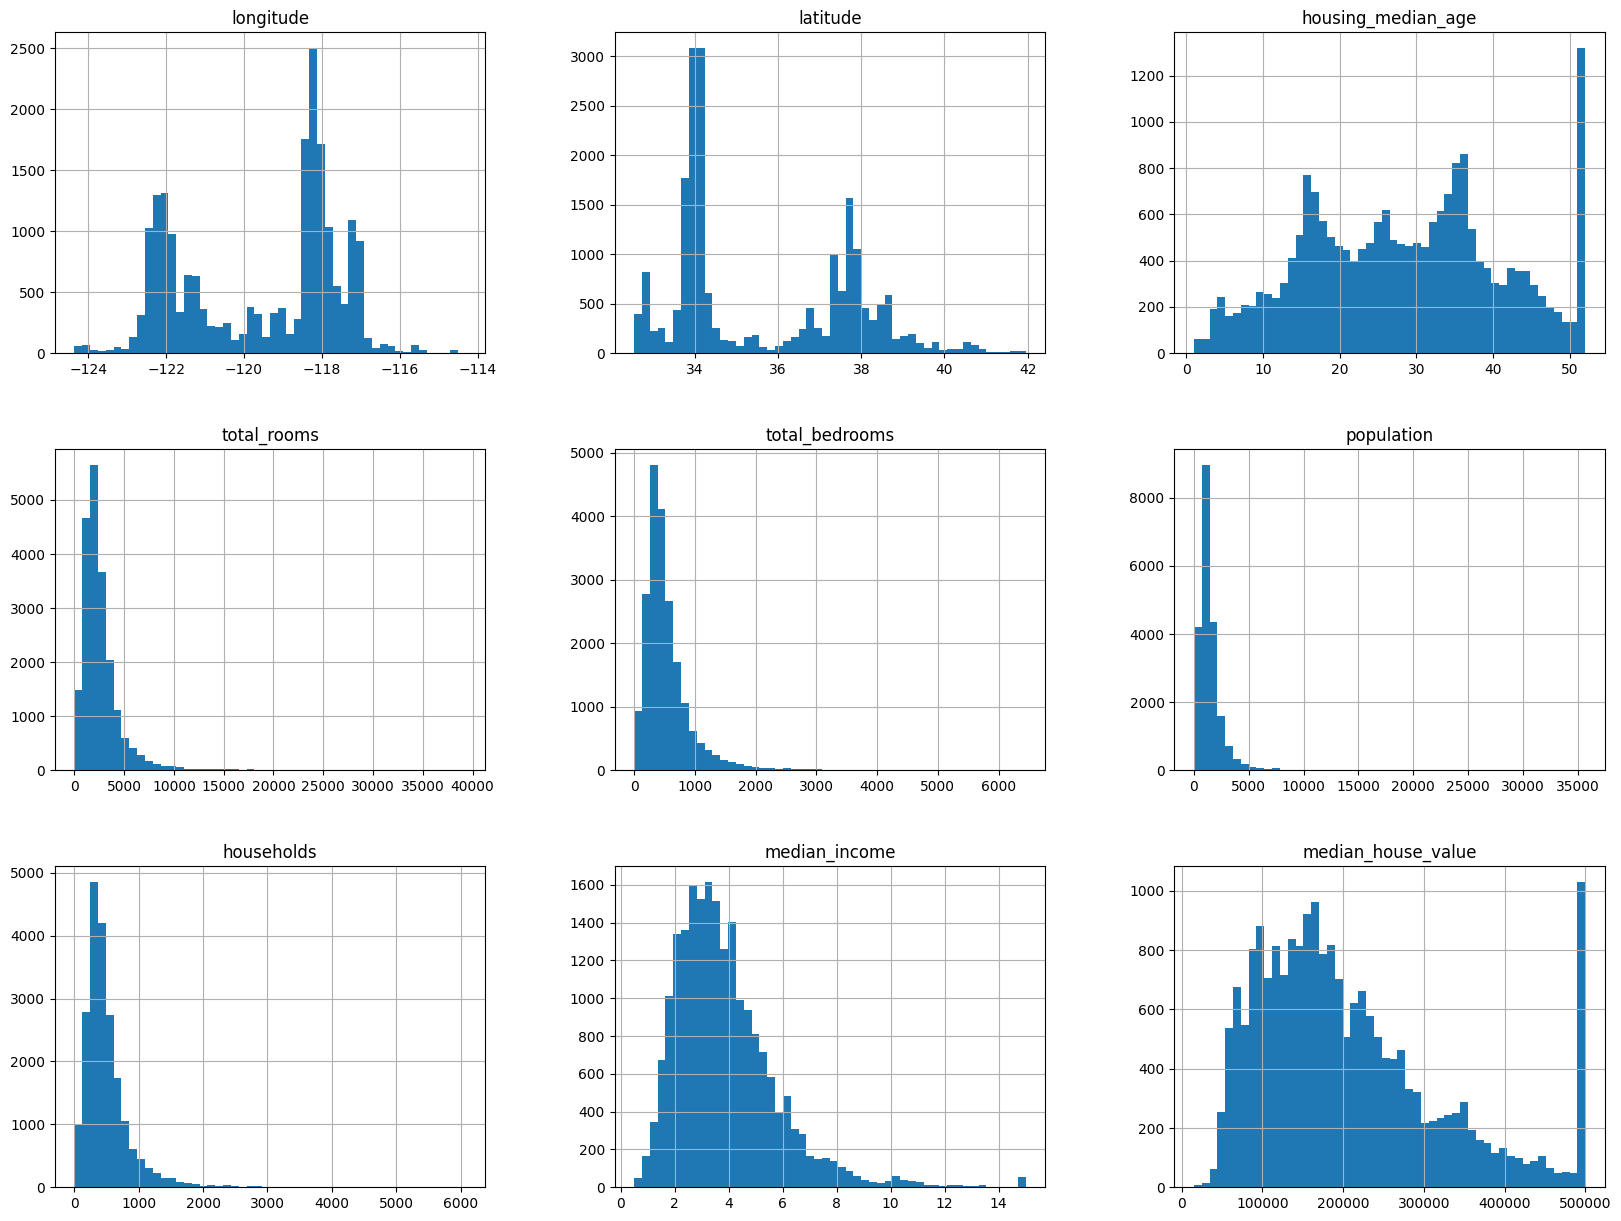

In [ ]:
df.hist(bins=50, figsize=(20,15))
plt.show()

Explanation for Histograms:

median_income: Right-skewed; most values are below 6.

housing_median_age: Peaks at 52; indicates many old houses.

#  Create a Stratified Test Set

In [ ]:
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit

# Random split
train_set_random, test_set_random = train_test_split(df, test_size=0.2, random_state=42)

# Stratified split based on income
df["income_cat"] = pd.cut(df["median_income"],
                          bins=[0., 1.5, 3.0, 4.5, 6., float("inf")],
                          labels=[1, 2, 3, 4, 5])

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(df, df["income_cat"]):
    strat_train_set = df.loc[train_index]
    strat_test_set = df.loc[test_index]

# Drop the stratification column
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)


 Test Set Creation:
Random Sampling:

Divides data randomly (e.g., train_test_split).

Problem: May lead to imbalanced distribution in critical features (like income).

Stratified Sampling:

Ensures test set has proportional representation of important feature (here: median_income).

Done using a new categorical column income_cat for stratification.

More representative and reliable, especially for skewed datasets.

Both sampling methods resulted in:

Train set: 16,512 entries

Test set: 4,128 entries

# **Geographical Visualization**

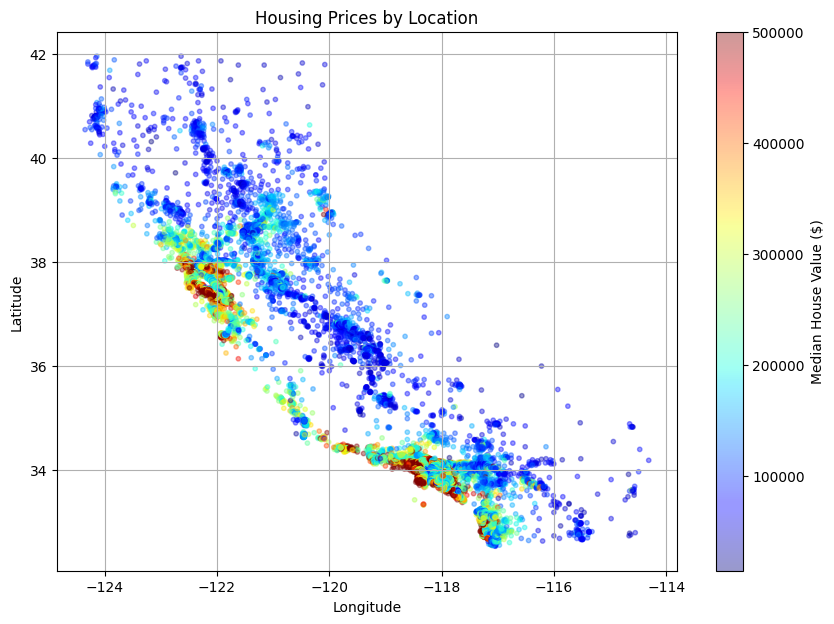

In [ ]:
plt.figure(figsize=(10, 7))
plt.scatter(df["longitude"], df["latitude"], alpha=0.4,
            c=df["median_house_value"], cmap="jet", s=10)
plt.colorbar(label="Median House Value ($)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Housing Prices by Location")
plt.grid(True)
plt.show()


# **Feature Correlation**

Plot a graph to show features correlation with housing price.
Which feature corelates to the maximum. Plot the graph for that
with housing price and analyze what the graph indicate

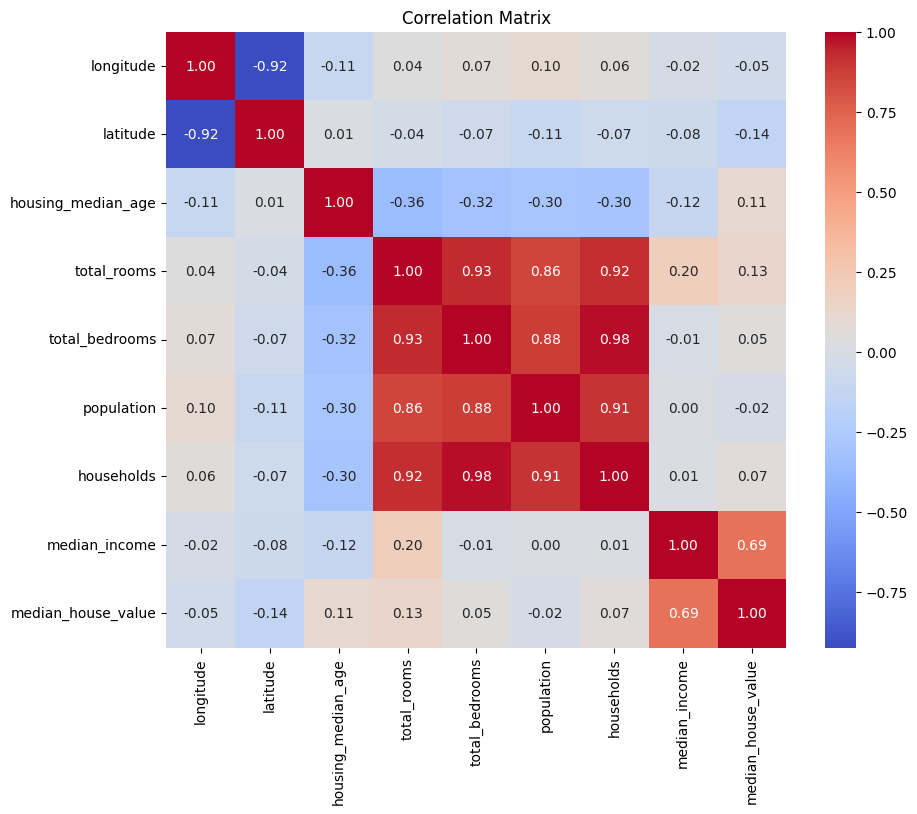

<Axes: xlabel='median_income', ylabel='median_house_value'>

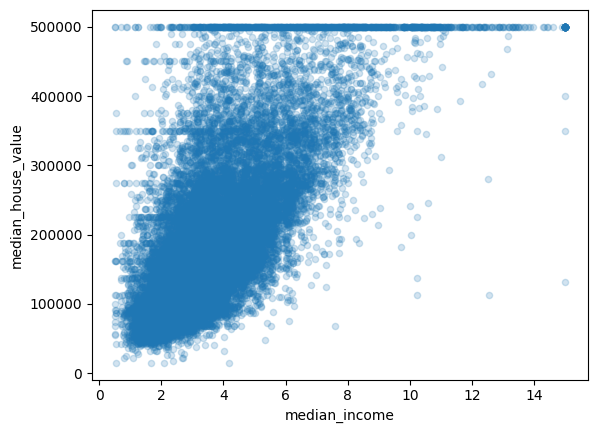

In [ ]:
corr_matrix = df.corr(numeric_only=True)
corr_matrix["median_house_value"].sort_values(ascending=False)

# Plot correlation matrix heatmap
import seaborn as sns
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

# Plot most correlated feature vs price
df.plot(kind="scatter", x="median_income", y="median_house_value", alpha=0.2)


median_income is most positively correlated with median_house_value.

# **Combine Features to Improve Correlation**

List the features that could be combined to improve correlation and plot again to see if correlation has improved

In [ ]:
df["rooms_per_household"] = df["total_rooms"] / df["households"]
df["bedrooms_per_room"] = df["total_bedrooms"] / df["total_rooms"]
df["population_per_household"] = df["population"] / df["households"]

df.corr(numeric_only=True)["median_house_value"].sort_values(ascending=False)


,median_house_value
median_house_value,1.000000
median_income,0.688075
rooms_per_household,0.151948
total_rooms,0.134153
housing_median_age,0.105623
households,0.065843
total_bedrooms,0.049686
population_per_household,-0.023737
population,-0.024650
longitude,-0.045967


Features that can be combined:
These combinations improve correlation compared to original features:

rooms_per_household = total_rooms / households
→ Better than total_rooms (0.152 vs 0.134)

bedrooms_per_room = total_bedrooms / total_rooms
→ Better negative correlation than total_bedrooms (-0.256 vs 0.049)

population_per_household = population / households
→ Slight negative correlation (-0.023)



# **Data Cleaning**

In [ ]:
# Check missing values
df.isnull().sum()

# # Fill missing 'total_bedrooms' with median
# median = df["total_bedrooms"].median()
# df["total_bedrooms"].fillna(median, inplace=True)

# Fill missing 'total_bedrooms' with median (safe way)
df["total_bedrooms"] = df["total_bedrooms"].fillna(median)



Features to Clean:

total_bedrooms: Missing values.

Outliers in population, total_rooms.



# **Handle Categorical Data**

Is there any categorical data that needs to be converted to
numerical? If so explain the method used to convert and code the same and show the output.

In [ ]:
# Check unique values
df["ocean_proximity"].value_counts()

# Convert using OneHotEncoder
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
ocean_prox_1hot = cat_encoder.fit_transform(df[["ocean_proximity"]])
ocean_prox_1hot.toarray()


array([[0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       ...,
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

# **Discuss the importance of feature scaling**

Scaling ensures equal weight for all features in algorithms like SVM, KNN, Linear Regression.

Without it, features with larger ranges dominate.

# **Design a pipeline inculcating (Custom transform, feature scaling and encoding). Explain how it works**

## **Build Full Pipeline**

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Separate numerical and categorical columns
df.drop("median_house_value", axis=1, inplace=False)
num_features = df.drop("ocean_proximity", axis=1).columns
cat_features = ["ocean_proximity"]

# Numeric pipeline
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('std_scaler', StandardScaler())
])

# Full pipeline
full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_features),
    ("cat", OneHotEncoder(), cat_features),
])

# Apply transformation
df_prepared = full_pipeline.fit_transform(df)


Dataset loaded successfully!
Data Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB
None

Data Description:
          longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861     

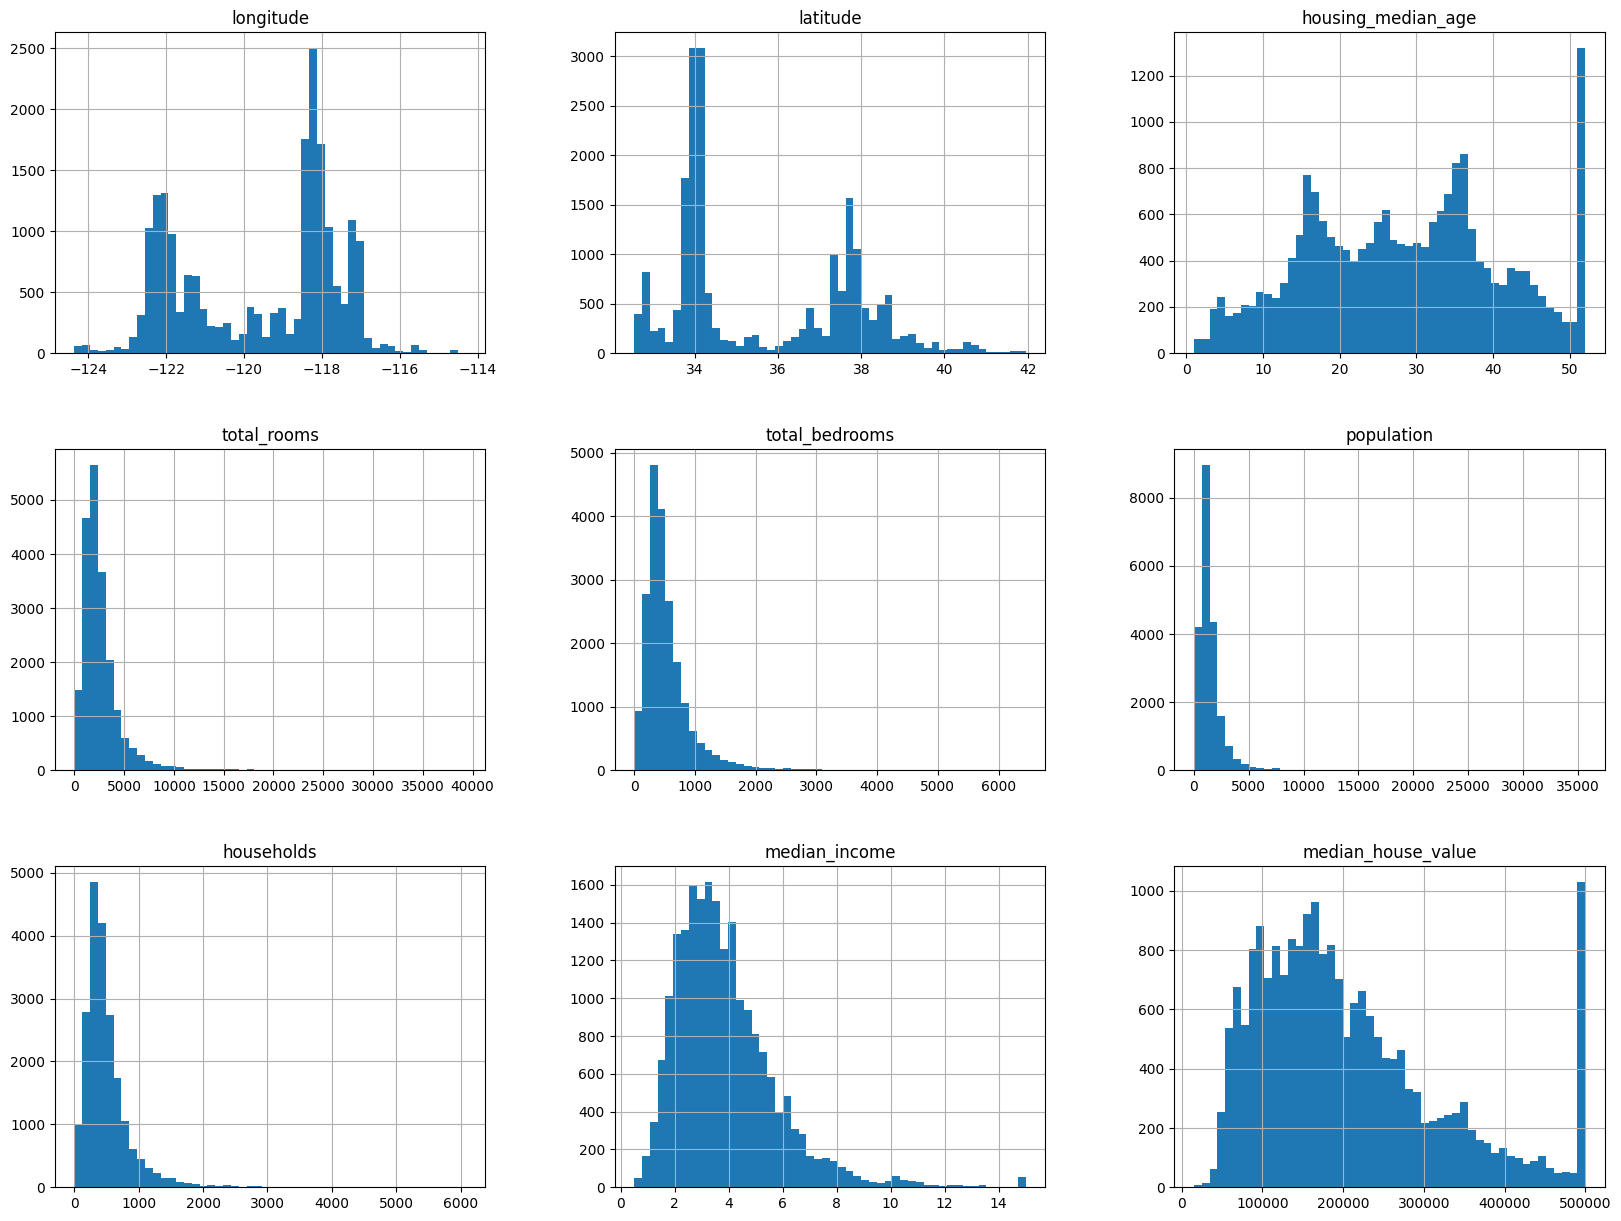

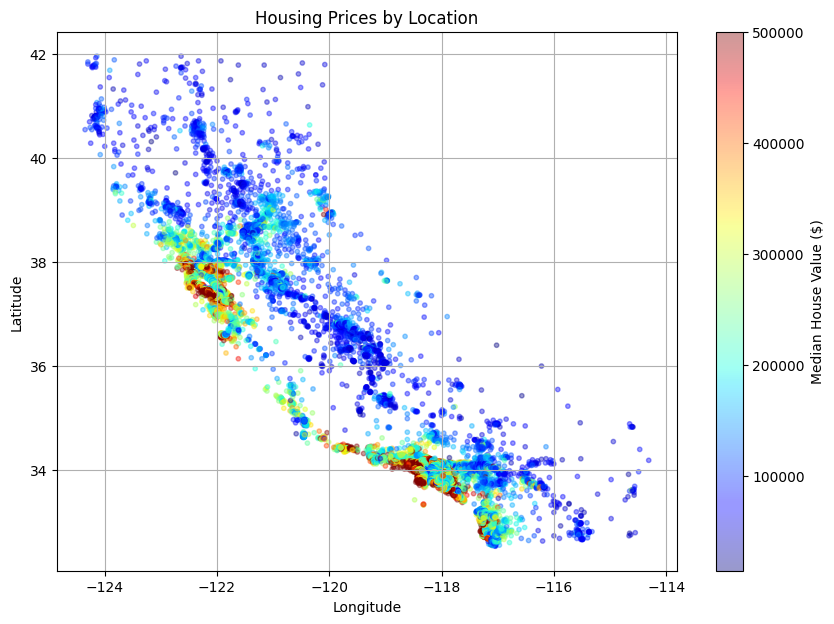

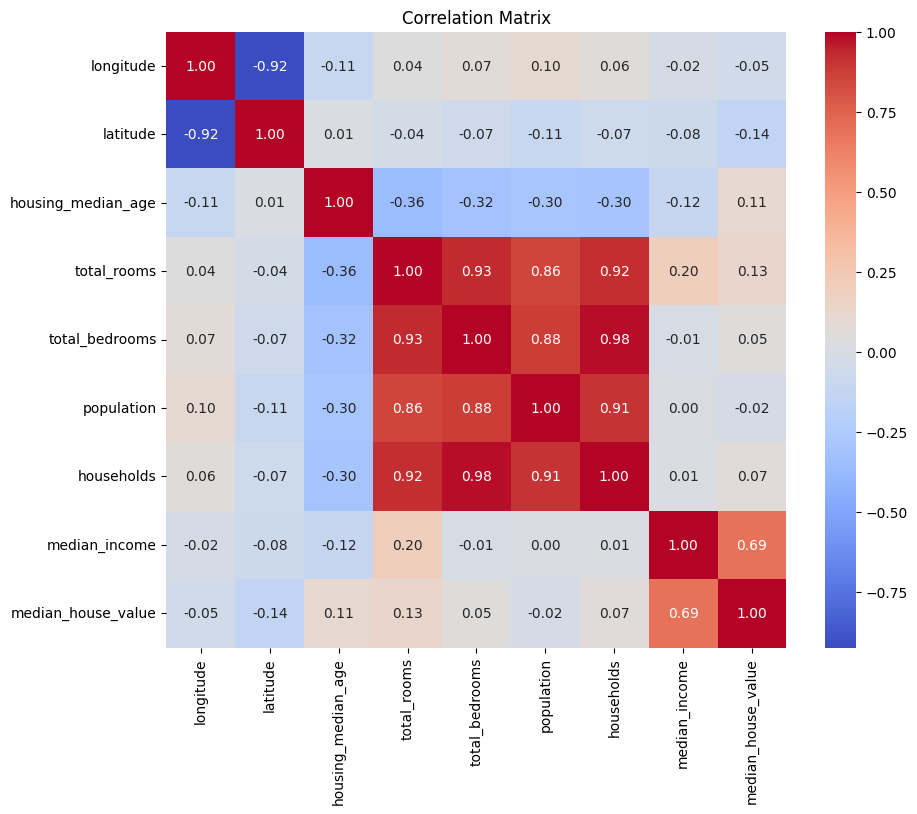

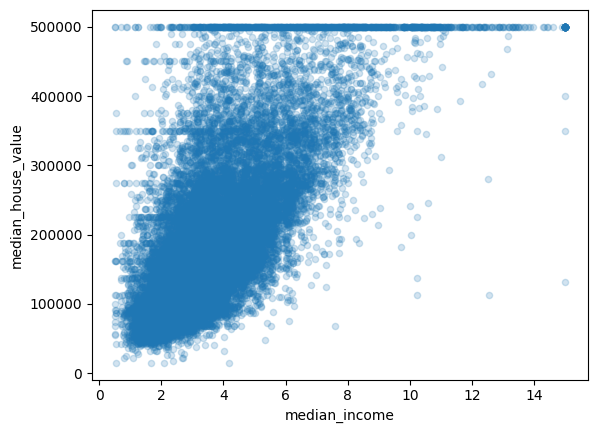

Simple Linear Regression:
  MSE: 7091157771.77
  R²: 0.459



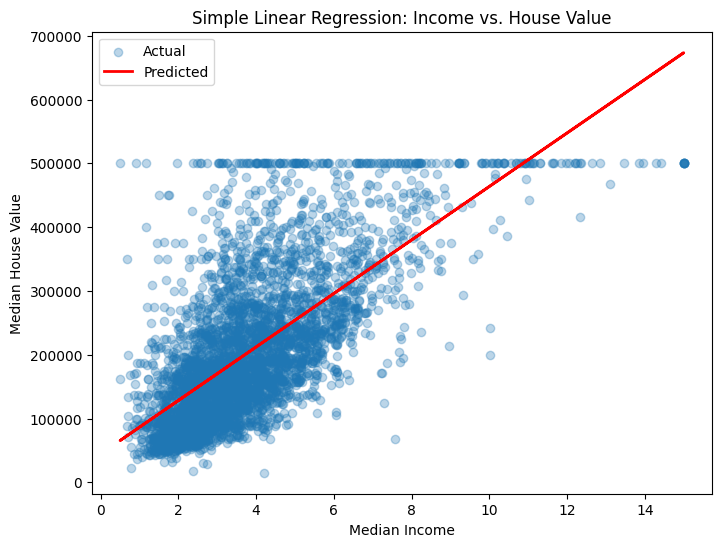

Multiple Linear Regression:
  MSE: 5624201863.51
  R²: 0.571



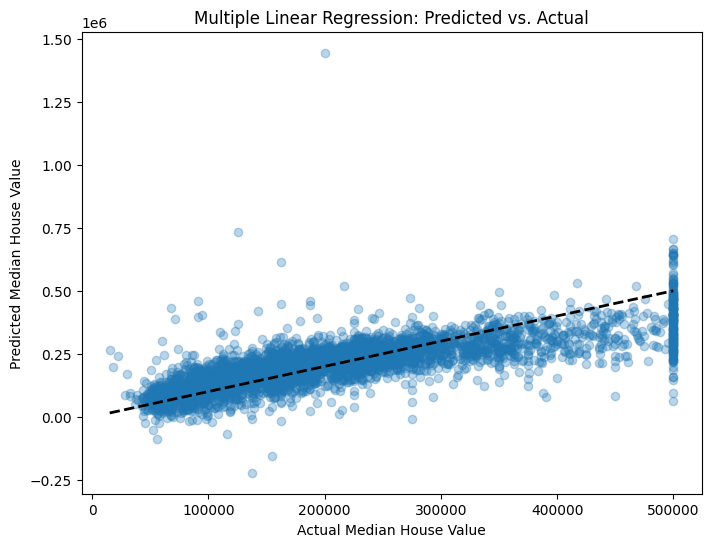

Top coefficients in multiple regression:
                Feature    Coefficient
10    bedrooms_per_room  364921.940314
7         median_income   35005.569351
8            income_cat   17637.936163
9   rooms_per_household    3453.642130
2    housing_median_age    1252.098942


In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from io import StringIO

# Load dataset from provided content
df = pd.read_csv("/content/housing.csv")
print("Dataset loaded successfully!")
df.head()

# Perform describe() and info()
print("Data Information:")
print(df.info())
print("\nData Description:")
print(df.describe())

# Plot Histograms
df.hist(bins=50, figsize=(20,15))
plt.show()

# Create a Stratified Test Set
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit

# Random split
train_set_random, test_set_random = train_test_split(df, test_size=0.2, random_state=42)

# Stratified split based on income
df["income_cat"] = pd.cut(df["median_income"],
                          bins=[0., 1.5, 3.0, 4.5, 6., float("inf")],
                          labels=[1, 2, 3, 4, 5])
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(df, df["income_cat"]):
    strat_train_set = df.loc[train_index]
    strat_test_set  = df.loc[test_index]

# Drop the stratification column
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

# Geographical Visualization
plt.figure(figsize=(10, 7))
plt.scatter(df["longitude"], df["latitude"], alpha=0.4,
            c=df["median_house_value"], cmap="jet", s=10)
plt.colorbar(label="Median House Value ($)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Housing Prices by Location")
plt.grid(True)
plt.show()

# Feature Correlation
corr_matrix = df.corr(numeric_only=True)
corr_matrix["median_house_value"].sort_values(ascending=False)

# Plot correlation matrix heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

# Plot most correlated feature vs price
df.plot(kind="scatter", x="median_income", y="median_house_value", alpha=0.2)
plt.show()

# Data Cleaning: Fill missing total_bedrooms
median = df["total_bedrooms"].median()
df["total_bedrooms"] = df["total_bedrooms"].fillna(median)

# Combine Features to Improve Correlation
df["rooms_per_household"]      = df["total_rooms"] / df["households"]
df["bedrooms_per_room"]        = df["total_bedrooms"] / df["total_rooms"]
df["population_per_household"] = df["population"] / df["households"]

# Handle Categorical Data
from sklearn.preprocessing import OneHotEncoder
cat_encoder       = OneHotEncoder()
ocean_prox_1hot   = cat_encoder.fit_transform(df[["ocean_proximity"]])
ocean_prox_1hot.toarray()

###############################################################################
#                             ### ADDED SECTION ###                           #
#           Simple & Multiple Linear Regression with Visualization            #
###############################################################################

from sklearn.linear_model    import LinearRegression
from sklearn.metrics         import mean_squared_error, r2_score
from sklearn.impute          import SimpleImputer

# 1. Prepare feature matrix X and target vector y
X = df.drop(["median_house_value", "ocean_proximity"], axis=1)
y = df["median_house_value"]

# 2. Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 3. Impute any remaining missing values using median strategy
imputer = SimpleImputer(strategy="median")
imputer.fit(X_train)
X_train = pd.DataFrame(imputer.transform(X_train), columns=X_train.columns)
X_test  = pd.DataFrame(imputer.transform(X_test),  columns=X_test.columns)

# 4. Simple Linear Regression using median_income
lin_reg = LinearRegression()
lin_reg.fit(X_train[["median_income"]], y_train)
y_pred_simple = lin_reg.predict(X_test[["median_income"]])

mse_simple = mean_squared_error(y_test, y_pred_simple)
r2_simple  = r2_score(y_test, y_pred_simple)
print(f"Simple Linear Regression:\n  MSE: {mse_simple:.2f}\n  R²: {r2_simple:.3f}\n")

# 4a. Plot Simple Regression
plt.figure(figsize=(8,6))
plt.scatter(X_test["median_income"], y_test, alpha=0.3, label="Actual")
plt.plot(
    X_test["median_income"], y_pred_simple,
    "r-", linewidth=2, label="Predicted"
)
plt.xlabel("Median Income")
plt.ylabel("Median House Value")
plt.title("Simple Linear Regression: Income vs. House Value")
plt.legend()
plt.show()

# 5. Multiple Linear Regression using all numerical features
multi_reg = LinearRegression()
multi_reg.fit(X_train, y_train)
y_pred_multi = multi_reg.predict(X_test)

mse_multi = mean_squared_error(y_test, y_pred_multi)
r2_multi  = r2_score(y_test, y_pred_multi)
print(f"Multiple Linear Regression:\n  MSE: {mse_multi:.2f}\n  R²: {r2_multi:.3f}\n")

# 5a. Plot Multiple Regression (Predicted vs Actual)
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred_multi, alpha=0.3)
plt.plot(
    [y_test.min(), y_test.max()],
    [y_test.min(), y_test.max()],
    "k--", linewidth=2
)
plt.xlabel("Actual Median House Value")
plt.ylabel("Predicted Median House Value")
plt.title("Multiple Linear Regression: Predicted vs. Actual")
plt.show()

# 6. Inspect coefficients for multiple regression
coeff_df = pd.DataFrame({
    "Feature":     X.columns,
    "Coefficient": multi_reg.coef_
}).sort_values(by="Coefficient", ascending=False)

print("Top coefficients in multiple regression:")
print(coeff_df.head())
